In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pylab as plt
import matplotlib.mlab as mlab
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
import datetime as dt
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

# suppress warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("final_dataframe.csv")
df = df.iloc[:, 1:]
df = df.dropna()
df = df.drop(columns = ["bbl",'population'])
df.shape

(5330, 66)

In [3]:
df.describe()

,price,price_per_sqft,beds,bathrooms,area,postal_code,distance_ts,duration_ts,distance_db,duration_db,...,general_count,general_div,school_count,school_div,hospital_count,hospital_div,linknyc_count,restaurant_count,restaurant_div,park_count
count,5.330000e+03,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,...,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000
mean,1.434308e+06,936.353428,3.057411,2.346248,10930.512383,10764.070544,9.786323,42.526454,10.710600,53.244278,...,92.110319,0.503055,11.813508,0.557041,0.346904,0.034629,23.248593,261.374296,0.874744,23.248593
std,2.411553e+06,8882.798131,2.422158,1.993668,51782.103367,581.047052,19.997624,29.267362,20.038434,29.999787,...,86.086592,0.109661,9.892295,0.237885,0.770245,0.128699,16.144111,348.095738,0.099614,16.144111
min,3.900000e+04,0.441346,0.000000,0.000000,1.000000,10001.000000,0.100000,1.000000,0.100000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.590000e+05,361.145833,1.000000,1.000000,960.250000,10038.000000,4.600000,22.000000,5.200000,34.000000,...,27.000000,0.452326,4.000000,0.500000,0.000000,0.000000,11.000000,47.000000,0.865000,11.000000
50%,7.990000e+05,551.617647,3.000000,2.000000,1500.000000,11103.000000,9.300000,41.000000,9.800000,50.000000,...,69.000000,0.497798,9.000000,0.640000,0.000000,0.000000,20.000000,118.000000,0.896293,20.000000
75%,1.400000e+06,996.020242,4.000000,3.000000,2446.750000,11249.000000,13.200000,58.000000,15.300000,72.000000,...,120.000000,0.583385,18.000000,0.716049,0.000000,0.000000,30.000000,290.000000,0.916475,30.000000
max,6.380000e+07,625000.000000,41.000000,76.000000,667517.000000,11694.000000,999.000000,999.000000,999.000000,999.000000,...,426.000000,0.666481,52.000000,0.859504,5.000000,0.666667,92.000000,1996.000000,0.948246,92.000000


In [4]:
df.corr()

,price,price_per_sqft,beds,bathrooms,area,postal_code,distance_ts,duration_ts,distance_db,duration_db,...,general_count,general_div,school_count,school_div,hospital_count,hospital_div,linknyc_count,restaurant_count,restaurant_div,park_count
price,1.000000,0.050208,0.178557,0.360440,-0.041523,-0.232317,-0.087869,-0.236327,-0.085418,-0.223598,...,0.358091,0.232296,0.170986,0.092764,0.025047,0.003464,0.183483,0.364138,0.025638,0.183483
price_per_sqft,0.050208,1.000000,-0.020313,-0.000289,-0.019136,-0.047284,-0.016907,-0.043503,-0.011809,-0.032661,...,0.055050,0.047136,0.026224,0.013657,-0.000424,-0.000267,0.018243,0.050463,0.001197,0.018243
beds,0.178557,-0.020313,1.000000,0.664619,-0.117032,0.202528,0.056710,0.173556,0.029295,0.113761,...,-0.210291,-0.186116,-0.048211,-0.046104,-0.005447,-0.020770,-0.097935,-0.247501,-0.019635,-0.097935
bathrooms,0.360440,-0.000289,0.664619,1.000000,-0.085466,0.056860,0.019068,0.060247,0.002684,0.029582,...,-0.051615,-0.071853,-0.020693,-0.033568,-0.004120,-0.002971,-0.044565,-0.058595,-0.031308,-0.044565
area,-0.041523,-0.019136,-0.117032,-0.085466,1.000000,-0.011556,-0.032182,-0.080946,-0.012502,-0.034338,...,0.100113,0.115695,-0.019709,0.019464,-0.007266,-0.011086,0.025980,0.056409,0.045081,0.025980
postal_code,-0.232317,-0.047284,0.202528,0.056860,-0.011556,1.000000,0.128481,0.345113,0.056577,0.149837,...,-0.588906,-0.207209,-0.439481,-0.125240,-0.112446,-0.141163,-0.373692,-0.544693,-0.054768,-0.373692
distance_ts,-0.087869,-0.016907,0.056710,0.019068,-0.032182,0.128481,1.000000,0.804501,0.975024,0.751398,...,-0.237104,-0.229565,-0.167200,-0.156146,-0.070690,-0.044372,-0.144796,-0.202881,-0.155387,-0.144796
duration_ts,-0.236327,-0.043503,0.173556,0.060247,-0.080946,0.345113,0.804501,1.000000,0.741382,0.825120,...,-0.593754,-0.484311,-0.426461,-0.375109,-0.161210,-0.103948,-0.378308,-0.523638,-0.247930,-0.378308
distance_db,-0.085418,-0.011809,0.029295,0.002684,-0.012502,0.056577,0.975024,0.741382,1.000000,0.799426,...,-0.186753,-0.199978,-0.147487,-0.140130,-0.075049,-0.035722,-0.112979,-0.169273,-0.139370,-0.112979
duration_db,-0.223598,-0.032661,0.113761,0.029582,-0.034338,0.149837,0.751398,0.825120,0.799426,1.000000,...,-0.500049,-0.448759,-0.409161,-0.388307,-0.183052,-0.092240,-0.331355,-0.457482,-0.233704,-0.331355


/anaconda3/envs/py2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


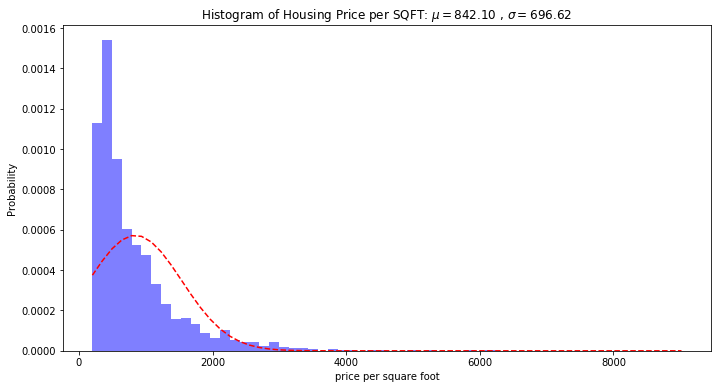

In [5]:
df = df[df['price_per_sqft'] > 200]
df = df[df['price_per_sqft'] < 10000]
df = df[df['distance_ts'] < 100]
df = df[df['duration_ts'] < 300]
df = df[df['distance_db'] < 100]
df = df[df['duration_db'] < 300]
df = df[df['distance_mn'] < 100]
df = df[df['duration_mn'] < 300]


mu = df['price_per_sqft'].mean()
sigma = np.std(df['price_per_sqft'])
x = df['price_per_sqft']


num_bins = 60
# the histogram of the data
f, ax = plt.subplots(1, figsize=(12, 6))
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='blue', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('price per square foot')
plt.ylabel('Probability')
plt.title(r'Histogram of Housing Price per SQFT: $\mu={:.2f}$ , $\sigma={:.2f}$'.format(mu, sigma))

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


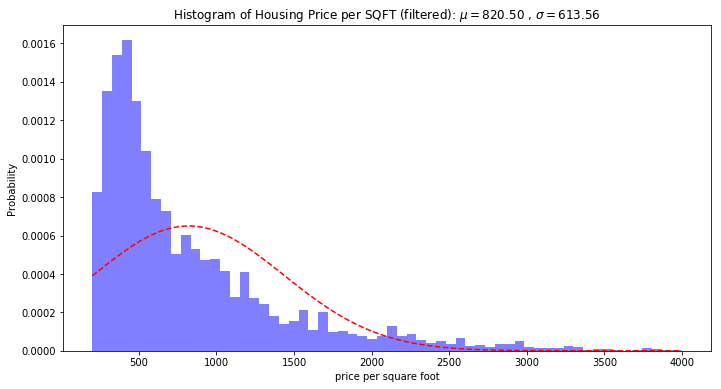

In [6]:
df = df[df['price_per_sqft'] < 4000]
df = df[df['yearbuilt'] > 1500]
df = df[df['pop_num'] > 0]

df['pop_mig_div_ind'] = df['pop_mig_div_ind'].astype(float)
df['pop_born_outstate_pct'] = df['pop_born_outstate_pct'].astype(float)

mu = df['price_per_sqft'].mean()
sigma = np.std(df['price_per_sqft'])
x = df['price_per_sqft']


num_bins = 60
# the histogram of the data
f, ax = plt.subplots(1, figsize=(12, 6))
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='blue', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('price per square foot')
plt.ylabel('Probability')
plt.title(r'Histogram of Housing Price per SQFT (filtered): $\mu={:.2f}$ , $\sigma={:.2f}$'.format(mu, sigma))

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

In [7]:
df.dtypes
df_temp = df.drop(columns = ["clean","geoid"])

df_temp=pd.get_dummies(df_temp)
df_temp.to_csv("forstats.csv")

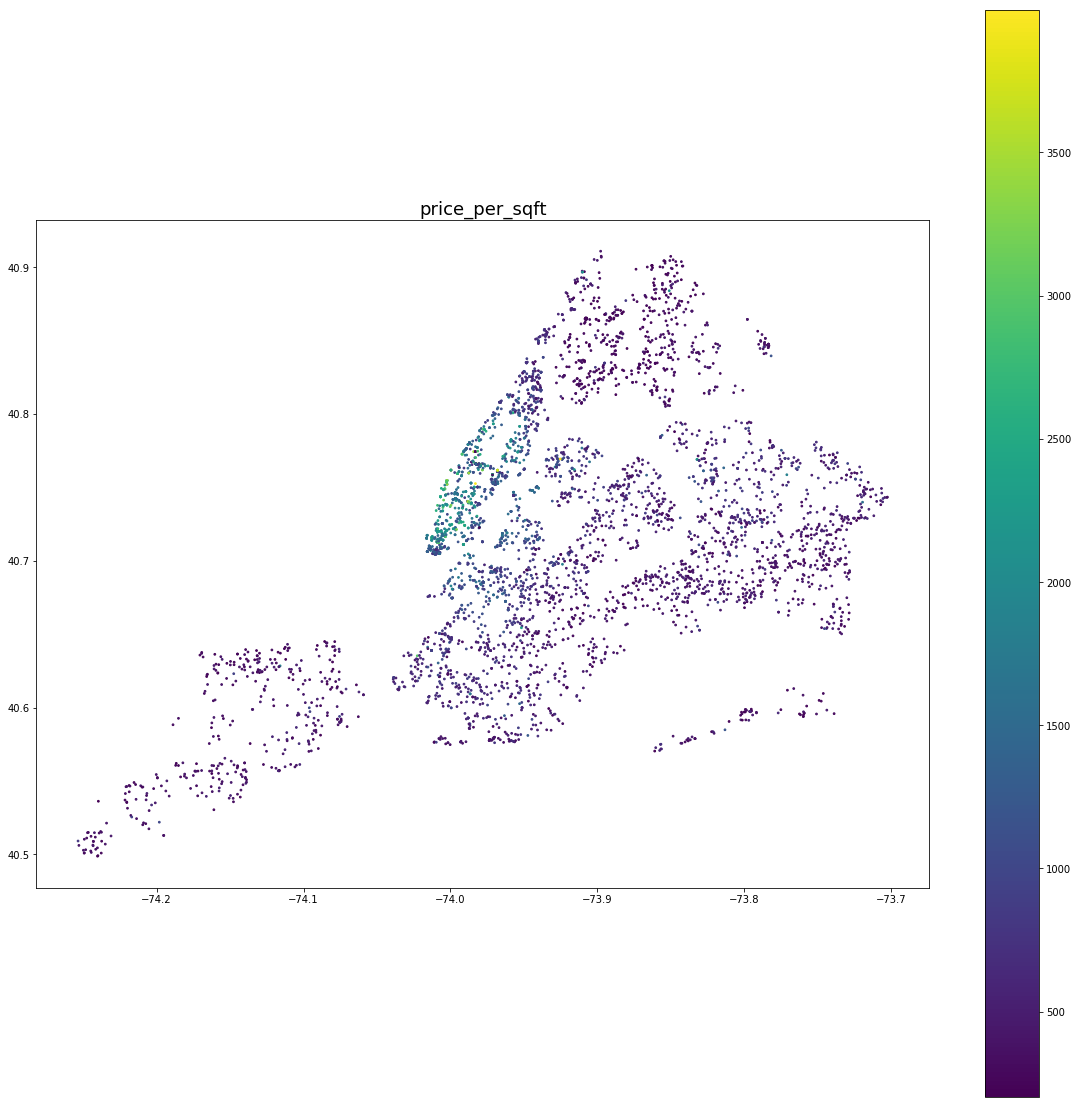

In [8]:
map_zillow = df[['price_per_sqft','lon','lat']]
map_zillow_gdf = gpd.GeoDataFrame(
    map_zillow, geometry=gpd.points_from_xy(map_zillow.lon, map_zillow.lat))


f, ax = plt.subplots(1, figsize=(20, 20))
ax.set_title('price_per_sqft', fontsize=18)
map_zillow_gdf.plot(ax=ax, column='price_per_sqft', legend=True, markersize = 3)

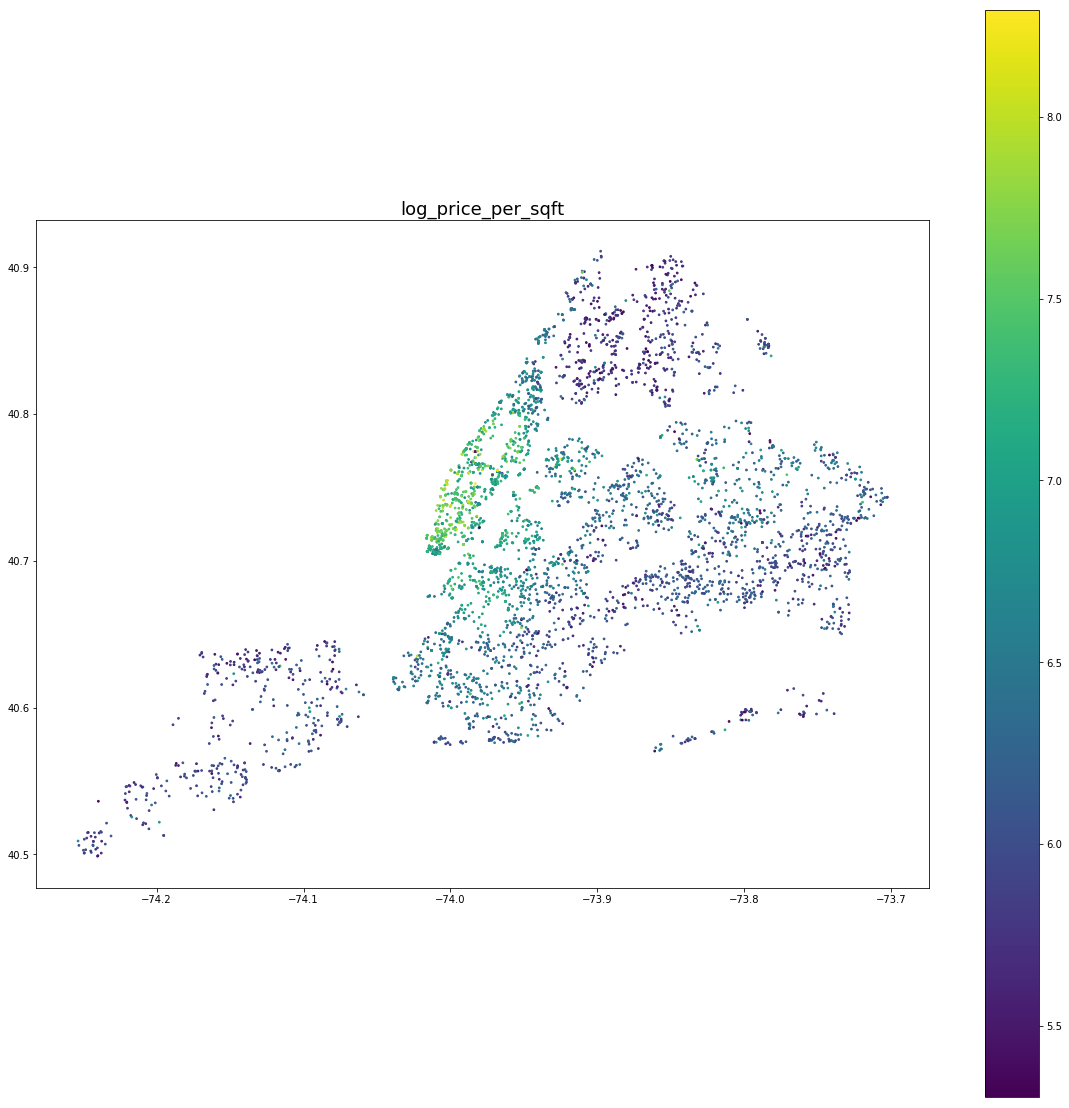

In [9]:
map_zillow = df[['price_per_sqft','lon','lat']]
map_zillow_gdf = gpd.GeoDataFrame(
    map_zillow, geometry=gpd.points_from_xy(map_zillow.lon, map_zillow.lat))


f, ax = plt.subplots(1, figsize=(20, 20))
map_zillow_gdf['price_per_sqft'] = np.log(map_zillow_gdf['price_per_sqft'])
ax.set_title('log_price_per_sqft', fontsize=18)
map_zillow_gdf.plot(ax=ax, column='price_per_sqft', legend=True, markersize = 3)

In [10]:
df['distance_to_ctr_avg'] = (df['distance_ts']+df['distance_db']+df['distance_mn'])/3
df['duration_to_ctr_avg'] = (df['duration_ts']+df['duration_db']+df['duration_mn'])/3
df = df.drop(columns = ['duration_ts', 'duration_db', 'duration_mn', 'distance_ts', 'distance_db', 'distance_mn'])


In [11]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

cluster_features = df[['beds', 'bathrooms', 'area', 'unitsres', 'unitstotal', 'residfar', 'yearbuilt']]

for n_clusters in range(2,7): #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = km.fit_predict(cluster_features)
    #report average Silhouette score
    silhouette_avg = silhouette_score(cluster_features, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.638606305883
For n_clusters =3, the average silhouette_score is :0.614544734258
For n_clusters =4, the average silhouette_score is :0.572416689495
For n_clusters =5, the average silhouette_score is :0.505174026413
For n_clusters =6, the average silhouette_score is :0.492038488152


/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


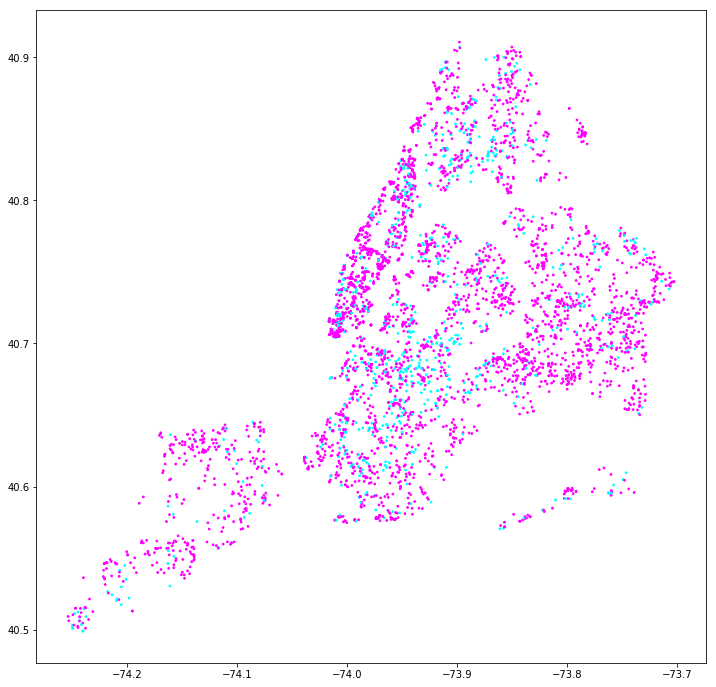

In [12]:
km=KMeans(random_state=1,n_clusters=2)
res=km.fit(cluster_features) #train the model
cluster_labels=res.labels_

cluster_map = df[['lon', 'lat']]
cluster_features['cluster_labels'] = cluster_labels

#cluster_map.plot(column='cluster_labels', legend=True, markersize = 3)
plt.figure(figsize = (12,12))
plt.scatter(cluster_map.lon,cluster_map.lat,c=cluster_labels,cmap=plt.cm.cool, s = 3)


In [13]:
cluster_1 = cluster_features[cluster_features['cluster_labels'] == 1]
cluster_1.describe()

,beds,bathrooms,area,unitsres,unitstotal,residfar,yearbuilt,cluster_labels
count,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.0
mean,2.638095,2.061153,1334.034085,104.882707,110.035088,3.171484,1954.939098,1.0
std,1.720317,1.213546,563.833718,251.887891,258.446686,3.281014,37.149641,0.0
min,0.000000,0.000000,225.000000,0.000000,0.000000,0.000000,1836.000000,1.0
25%,1.000000,1.000000,860.000000,1.000000,2.000000,0.500000,1925.000000,1.0
50%,2.000000,2.000000,1250.000000,10.000000,12.000000,2.000000,1950.000000,1.0
75%,3.000000,3.000000,1744.000000,118.000000,127.000000,4.000000,1989.000000,1.0
max,12.000000,21.000000,2626.000000,3857.000000,3986.000000,10.000000,2019.000000,1.0


In [14]:
cluster_0 = cluster_features[cluster_features['cluster_labels'] == 0]
cluster_0.describe()

,beds,bathrooms,area,unitsres,unitstotal,residfar,yearbuilt,cluster_labels
count,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.0
mean,5.775336,4.194750,3934.840049,13.796093,15.566545,2.598950,1940.199023,0.0
std,3.564060,3.662352,2400.947105,45.641649,50.092325,2.629647,38.369306,0.0
min,0.000000,0.000000,2632.000000,0.000000,0.000000,0.000000,1880.000000,0.0
25%,4.000000,3.000000,2982.000000,2.000000,2.000000,0.750000,1910.000000,0.0
50%,5.000000,4.000000,3301.000000,3.000000,3.000000,2.000000,1930.000000,0.0
75%,7.000000,5.000000,4079.000000,4.000000,5.000000,3.440000,1965.000000,0.0
max,41.000000,76.000000,32000.000000,478.000000,617.000000,10.000000,2019.000000,0.0


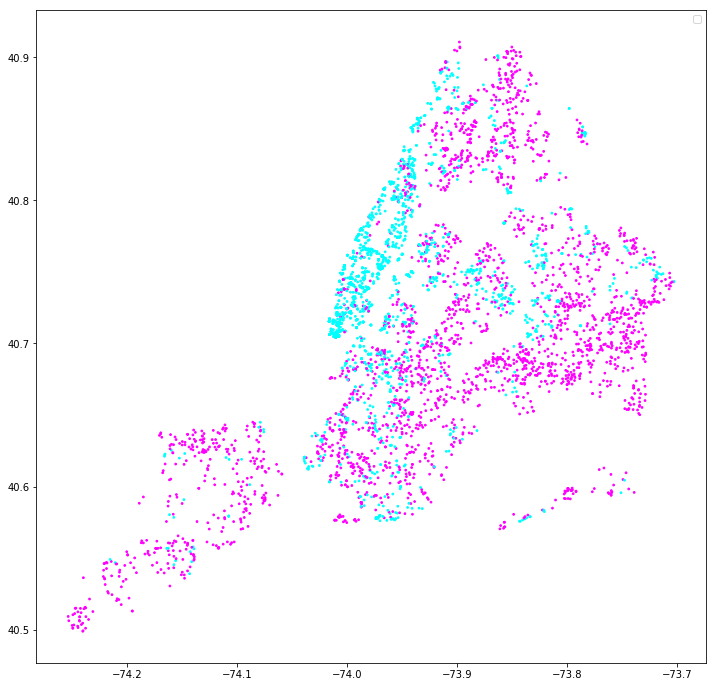

In [264]:
cluster_features = cluster_features.iloc[:,0:7]
from sklearn.mixture import GaussianMixture # You can import this only if you are using 0.18+ sklearn.

res1=GaussianMixture(n_components=2,random_state=324).fit(cluster_features)
L2=res1.predict(cluster_features)
cluster_features['cluster_labels_gm'] = L2

plt.figure(figsize = (12,12))
plt.legend()
plt.scatter(cluster_map.lon,cluster_map.lat,c=L2,cmap=plt.cm.cool, s = 3)

In [203]:
cluster_1 = cluster_features[cluster_features['cluster_labels_gm'] == 1]
cluster_1.describe()

,beds,bathrooms,area,unitsres,unitstotal,residfar,yearbuilt,cluster_labels_gm
count,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.0
mean,4.463328,3.035883,2320.542192,1.966483,2.039826,1.216443,1939.344637,1.0
std,2.625215,2.482224,1743.242904,1.728762,1.872986,1.043606,31.379693,0.0
min,0.000000,0.000000,350.000000,0.000000,0.000000,0.000000,1865.000000,1.0
25%,3.000000,2.000000,1420.000000,1.000000,1.000000,0.500000,1920.000000,1.0
50%,4.000000,3.000000,1960.000000,2.000000,2.000000,0.750000,1930.000000,1.0
75%,6.000000,4.000000,2750.000000,2.000000,2.000000,2.000000,1955.000000,1.0
max,41.000000,76.000000,32000.000000,39.000000,39.000000,10.000000,2019.000000,1.0


In [204]:
cluster_0 = cluster_features[cluster_features['cluster_labels_gm'] == 0]
cluster_0.describe()

,beds,bathrooms,area,unitsres,unitstotal,residfar,yearbuilt,cluster_labels_gm
count,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.0
mean,1.732072,1.742411,1170.494941,186.886934,196.487462,5.146441,1967.026837,0.0
std,1.043050,1.009404,753.800848,310.778863,317.638008,3.482038,38.924773,0.0
min,0.000000,0.000000,225.000000,0.000000,0.000000,0.000000,1836.000000,0.0
25%,1.000000,1.000000,729.000000,36.000000,43.000000,2.430000,1930.000000,0.0
50%,2.000000,1.000000,950.000000,98.000000,106.000000,4.000000,1963.000000,0.0
75%,2.000000,2.000000,1311.000000,202.000000,218.000000,10.000000,2006.000000,0.0
max,7.000000,10.000000,9000.000000,3857.000000,3986.000000,10.000000,2019.000000,0.0


In [33]:
def Regularization_fit_alpha(model,X_train,y_train,X_valid,y_valid,alphas,Graph=False, logl=False):
    #model = 1-Ridge, 2-Lasso
    #aplhas: a list of aplha values to try
    #Graph: plot the graph of R^2 values for different alpha

    R_2_OS=[] #out of sample R2's
    
    #initialize the model to use for each given alpha
    if model==1:
        RM = lambda a: linear_model.Ridge(fit_intercept=True, alpha=a, normalize=True)
        model_label='Ridge'
    else:
        RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a, normalize=True)
        model_label='Lasso'
    
    best_R2 = -1
    best_alpha = alphas[0]
    best_coefs = []
    
    for a in alphas: #for all alphas to try
        lm = RM(a) #assign the model
        lm.fit(X_train,y_train)  #fit the regularization model
        y_predict=lm.predict(X_valid) #compute the prediction for the validation sample 
        R_2_OS_=r2_score(y_valid,y_predict)
        R_2_OS.append(R_2_OS_)
        if R_2_OS_ > best_R2: #if current OS R2 is the best - update the best solution
            best_R2 = R_2_OS_
            best_alpha = a
            best_coefs = lm.coef_
    
    if Graph==True: #visualization of the performance depending on alpha
        plt.title('OS-R-squared for different Alpha')
        if logl: #log-scale
            plt.xlabel('ln(Alpha)')
            l=np.log(alphas)
            bl=np.log(best_alpha)
        else:
            plt.xlabel('Alpha')
            l=alphas
            bl=best_alpha
        plt.ylim((-0.1,1))
        plt.plot(l,R_2_OS,'b',label=model_label)
        plt.legend(loc='upper right')
        plt.ylabel('R-squared')
        plt.axvline(bl,color='r',linestyle='--')

        plt.show()
    
    return [best_alpha,best_R2,best_coefs]

In [29]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state = 100)

In [30]:
#area was excluded due to high p-value
lm = smf.ols(formula = 'price_per_sqft ~ beds+bathrooms+numfloors+unitsres+residfar+yearbuilt', data = df_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         price_per_sqft   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     637.2
Date:                Tue, 17 Dec 2019   Prob (F-statistic):               0.00
Time:                        09:59:47   Log-Likelihood:                -25124.
No. Observations:                3366   AIC:                         5.026e+04
Df Residuals:                    3359   BIC:                         5.031e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1319.4249    411.010     -3.210      0.0

In [31]:
r2_score(df_test.price_per_sqft,lm.predict(df_test))

0.4919289313801888

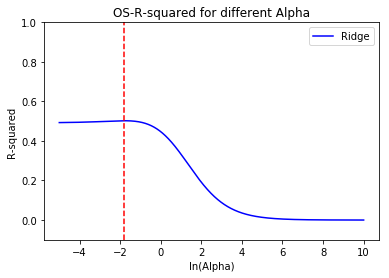

Optimal alpha for Ridge=0.164280389645, best OS R_2=0.5023122579


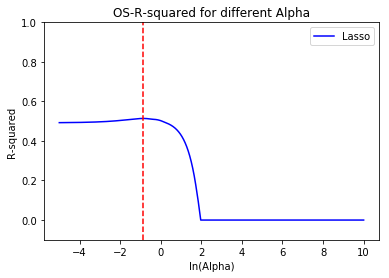

Optimal alpha for Lasso=0.42588524006, best OS R_2=0.513887409815


In [34]:
dataTrain = df_train[['price_per_sqft', 'beds', 'bathrooms','numfloors','unitsres', 'residfar','yearbuilt']]
dataTest = df_test[['price_per_sqft', 'beds', 'bathrooms','numfloors','unitsres', 'residfar','yearbuilt']]

alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
[alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(1,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
print('Optimal alpha for Ridge={0}, best OS R_2={1}'.format(alpha_optimal,best_R2))
alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
[alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(2,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
print('Optimal alpha for Lasso={0}, best OS R_2={1}'.format(alpha_optimal,best_R2))

In [222]:

lm_ridge = linear_model.Ridge(fit_intercept=True, alpha=0.164280389645) #assign the model
lm_ridge.fit(dataTrain.iloc[:,1:],dataTrain.price_per_sqft)
print(lm_ridge.coef_)

lm_lasso = linear_model.Lasso(fit_intercept=True, alpha=0.42588524006) #assign the model
lm_lasso.fit(dataTrain.iloc[:,1:],dataTrain.price_per_sqft)
print(lm_lasso.coef_)


[-34.50728584  74.21291765  18.41754502  -0.27345635  61.89952269
   0.88478701]
[-34.21849765  73.78040936  18.43174647  -0.27344526  61.8430482
   0.88677732]


In [35]:
#distance was excluded due to high p-value
lm1 = smf.ols(formula = 'price_per_sqft ~ beds+bathrooms+numfloors+unitsres+residfar+yearbuilt+duration_to_ctr_avg', data = df_train).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         price_per_sqft   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     686.3
Date:                Tue, 17 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:01:48   Log-Likelihood:                -24908.
No. Observations:                3366   AIC:                         4.983e+04
Df Residuals:                    3358   BIC:                         4.988e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1776.2693    

In [36]:
r2_score(df_test.price_per_sqft,lm1.predict(df_test))

0.5403727486450771

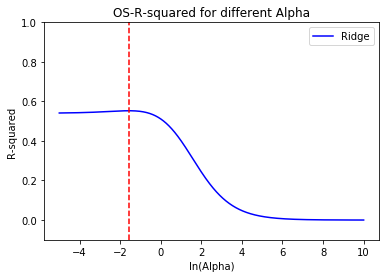

Optimal alpha for Ridge=0.207908527903, best OS R_2=0.552869764971


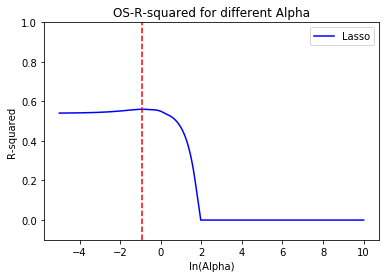

Optimal alpha for Lasso=0.406533066459, best OS R_2=0.560479138388


In [225]:
dataTrain = df_train[['price_per_sqft', 'beds', 'bathrooms','numfloors','unitsres', 'residfar','yearbuilt', 'duration_to_ctr_avg']]
dataTest = df_test[['price_per_sqft', 'beds', 'bathrooms','numfloors','unitsres', 'residfar','yearbuilt','duration_to_ctr_avg']]

alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
[alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(1,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
print('Optimal alpha for Ridge={0}, best OS R_2={1}'.format(alpha_optimal,best_R2))
alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
[alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(2,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
print('Optimal alpha for Lasso={0}, best OS R_2={1}'.format(alpha_optimal,best_R2))

In [226]:
lm_ridge = linear_model.Ridge(fit_intercept=True, alpha=0.207908527903) #assign the model
lm_ridge.fit(dataTrain.iloc[:,1:],dataTrain.price_per_sqft)
print(lm_ridge.coef_)

lm_lasso = linear_model.Lasso(fit_intercept=True, alpha=0.406533066459) #assign the model
lm_lasso.fit(dataTrain.iloc[:,1:],dataTrain.price_per_sqft)
print(lm_lasso.coef_)

[-32.36528177  72.46688818  16.30358657  -0.23945475  30.78325252
   1.43434897 -10.817108  ]
[-32.08919792  72.05411462  16.31614071  -0.23942747  30.71397662
   1.43651078 -10.82236395]


In [38]:
lm2 = smf.ols(formula = 'price_per_sqft ~ pop_num + pop_race_white_pct + pop_foreign_pct + pop_pov_pct + pop_edu_collp_pct + hh_inc_med + crime_all_rt', data = df_train).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:         price_per_sqft   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     495.9
Date:                Tue, 17 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:02:22   Log-Likelihood:                -25208.
No. Observations:                3366   AIC:                         5.043e+04
Df Residuals:                    3358   BIC:                         5.048e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -635.2236     47

In [39]:
r2_score(df_test.price_per_sqft,lm2.predict(df_test))

0.541080290758186

In [ ]:
dataTrain = df_train[['price_per_sqft','pop_num', 'pop_race_white_pct', 'pop_foreign_pct','pop_pov_pct','pop_edu_collp_pct', 'pop_edu_collp_pct','hh_inc_med', 'crime_all_rt']]
dataTest = df_test[['price_per_sqft','pop_num', 'pop_race_white_pct', 'pop_foreign_pct','pop_pov_pct','pop_edu_collp_pct', 'pop_edu_collp_pct','hh_inc_med', 'crime_all_rt']]

alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
[alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(1,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
print('Optimal alpha for Ridge={0}, best OS R_2={1}'.format(alpha_optimal,best_R2))
alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
[alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(2,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
print('Optimal alpha for Lasso={0}, best OS R_2={1}'.format(alpha_optimal,best_R2))

In [230]:
lm_ridge = linear_model.Ridge(fit_intercept=True, alpha=0.00673794699909) #assign the model
lm_ridge.fit(dataTrain.iloc[:,1:],dataTrain.price_per_sqft)
print(lm_ridge.coef_)

lm_lasso = linear_model.Lasso(fit_intercept=True, alpha=0.00673794699909) #assign the model
lm_lasso.fit(dataTrain.iloc[:,1:],dataTrain.price_per_sqft)
print(lm_lasso.coef_)

[ 7.72366631e-03 -1.01747594e+02  3.27706034e+02  1.79603807e+03
  7.86397670e+02  7.86397670e+02  4.66121637e-03  2.12378893e-01]
[ 7.72782770e-03 -1.01621077e+02  3.27337523e+02  1.79548540e+03
  1.57240108e+03  0.00000000e+00  4.66105423e-03  2.12495351e-01]


In [231]:
# remove college
lm2 = smf.ols(formula = 'price_per_sqft ~ pop_num + pop_race_white_pct + pop_foreign_pct + pop_pov_pct + hh_inc_med + crime_all_rt', data = df_train).fit()
print(lm2.summary())
r2_score(df_test.price_per_sqft,lm2.predict(df_test))


                            OLS Regression Results                            
Dep. Variable:         price_per_sqft   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     367.2
Date:                Mon, 16 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:42:53   Log-Likelihood:                -25554.
No. Observations:                3366   AIC:                         5.112e+04
Df Residuals:                    3359   BIC:                         5.117e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -625.6682     52

0.44467755237142226

In [232]:
lm3 = smf.ols(formula = 'price_per_sqft ~ noise_count + cb_count + general_count + school_count + linknyc_count + park_count', data = df_train).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:         price_per_sqft   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     705.2
Date:                Mon, 16 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:43:10   Log-Likelihood:                -25196.
No. Observations:                3366   AIC:                         5.040e+04
Df Residuals:                    3360   BIC:                         5.044e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       474.4144     15.042     31.540

In [233]:
r2_score(df_test.price_per_sqft,lm3.predict(df_test))

0.5169351473020058

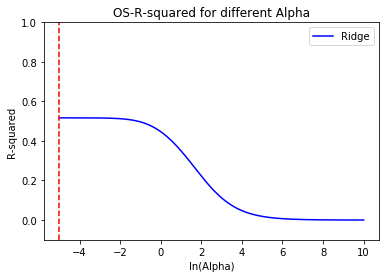

Optimal alpha for Ridge=0.00673794699909, best OS R_2=0.516939283613


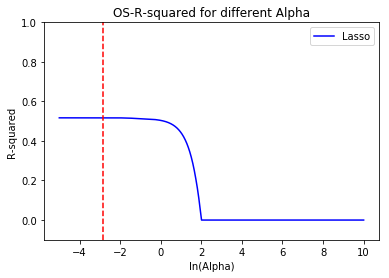

Optimal alpha for Lasso=0.057741150552, best OS R_2=0.517217452963


In [234]:
dataTrain = df_train[['price_per_sqft', 'noise_count', 'cb_count', 'general_count', 'school_count', 'linknyc_count', 'park_count']]
dataTest = df_test[['price_per_sqft', 'noise_count', 'cb_count', 'general_count', 'school_count', 'linknyc_count', 'park_count']]

alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
[alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(1,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
print('Optimal alpha for Ridge={0}, best OS R_2={1}'.format(alpha_optimal,best_R2))
alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
[alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(2,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
print('Optimal alpha for Lasso={0}, best OS R_2={1}'.format(alpha_optimal,best_R2))

In [235]:
lm_ridge = linear_model.Ridge(fit_intercept=True, alpha=0.00673794699909) #assign the model
lm_ridge.fit(dataTrain.iloc[:,1:],dataTrain.price_per_sqft)
print(lm_ridge.coef_)

lm_lasso = linear_model.Lasso(fit_intercept=True, alpha=0.057741150552) #assign the model
lm_lasso.fit(dataTrain.iloc[:,1:],dataTrain.price_per_sqft)
print(lm_lasso.coef_)

[-2.63602215e-02  2.06658437e-03  2.65857256e+00  1.95529630e+00
  7.52027003e-01  7.52027002e-01]
[-2.63572459e-02  2.06662452e-03  2.65853185e+00  1.95425308e+00
  1.50390379e+00  0.00000000e+00]


In [240]:
lm3 = smf.ols(formula = 'price_per_sqft ~ noise_count + cb_count + general_count + school_count + linknyc_count', data = df_train).fit()
print(lm3.summary())
r2_score(df_test.price_per_sqft,lm3.predict(df_test))

                            OLS Regression Results                            
Dep. Variable:         price_per_sqft   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     705.2
Date:                Mon, 16 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:50:15   Log-Likelihood:                -25196.
No. Observations:                3366   AIC:                         5.040e+04
Df Residuals:                    3360   BIC:                         5.044e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       474.4144     15.042     31.540

0.5169351473020058

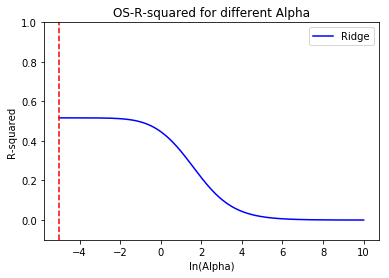

Optimal alpha for Ridge=0.00673794699909, best OS R_2=0.516942335657


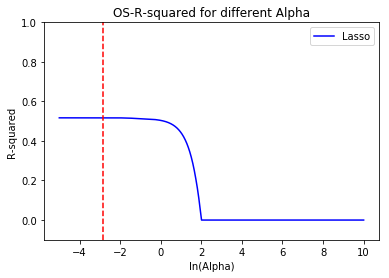

Optimal alpha for Lasso=0.057741150552, best OS R_2=0.517217452963


In [40]:
dataTrain = df_train[['price_per_sqft', 'noise_count', 'cb_count', 'general_count', 'school_count', 'linknyc_count']]
dataTest = df_test[['price_per_sqft', 'noise_count', 'cb_count', 'general_count', 'school_count', 'linknyc_count']]

alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
[alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(1,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
print('Optimal alpha for Ridge={0}, best OS R_2={1}'.format(alpha_optimal,best_R2))
alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
[alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(2,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
print('Optimal alpha for Lasso={0}, best OS R_2={1}'.format(alpha_optimal,best_R2))

In [241]:
lm4 = smf.ols(formula = 'price_per_sqft ~  pop_race_div_idx + pop_mig_div_ind + cb_div + general_div + school_div + hospital_div + restaurant_div', data = df_train).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:         price_per_sqft   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     504.6
Date:                Mon, 16 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:50:29   Log-Likelihood:                -25194.
No. Observations:                3366   AIC:                         5.040e+04
Df Residuals:                    3358   BIC:                         5.045e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          553.1884     83.871  

In [242]:
r2_score(df_test.price_per_sqft,lm4.predict(df_test))

0.51119967017737

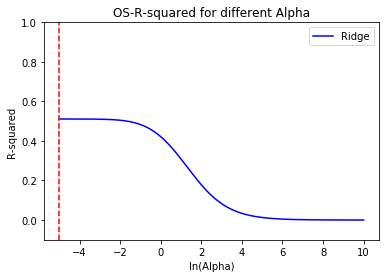

Optimal alpha for Ridge=0.00673794699909, best OS R_2=0.511181222901


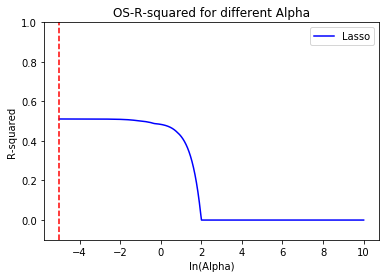

Optimal alpha for Lasso=0.00673794699909, best OS R_2=0.51117114197


In [243]:
dataTrain = df_train[['price_per_sqft', 'pop_race_div_idx', 'pop_mig_div_ind', 'cb_div', 'general_div', 'school_div', 'hospital_div', 'restaurant_div']]
dataTest = df_test[['price_per_sqft', 'pop_race_div_idx', 'pop_mig_div_ind', 'cb_div', 'general_div', 'school_div', 'hospital_div', 'restaurant_div']]

alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
[alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(1,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
print('Optimal alpha for Ridge={0}, best OS R_2={1}'.format(alpha_optimal,best_R2))
alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
[alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(2,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
print('Optimal alpha for Lasso={0}, best OS R_2={1}'.format(alpha_optimal,best_R2))

In [244]:
lm_ridge = linear_model.Ridge(fit_intercept=True, alpha=0.00673794699909) #assign the model
lm_ridge.fit(dataTrain.iloc[:,1:],dataTrain.price_per_sqft)
print(lm_ridge.coef_)

lm_lasso = linear_model.Lasso(fit_intercept=True, alpha=0.00673794699909) #assign the model
lm_lasso.fit(dataTrain.iloc[:,1:],dataTrain.price_per_sqft)
print(lm_lasso.coef_)

[-194.27360918  295.64484178   63.88621383 1130.1747262  -128.59396245
 -132.01445526 -674.66744671]
[-193.82344924  293.75919136   63.9064407  1129.22950612 -128.41141002
 -131.7285232  -673.70027725]


In [245]:
lm5 = smf.ols(formula = 'price_per_sqft ~  noise_count + park_count + cb_count * cb_div + general_count * general_div + school_count * school_div + hospital_count * hospital_div + restaurant_count * restaurant_div', data = df_train).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:         price_per_sqft   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     307.5
Date:                Mon, 16 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:52:44   Log-Likelihood:                -24820.
No. Observations:                3366   AIC:                         4.968e+04
Df Residuals:                    3348   BIC:                         4.979e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [246]:
r2_score(df_test.price_per_sqft,lm5.predict(df_test))

0.604827753081892

                            OLS Regression Results                            
Dep. Variable:         price_per_sqft   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     571.3
Date:                Tue, 17 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:16:35   Log-Likelihood:                -24529.
No. Observations:                3366   AIC:                         4.908e+04
Df Residuals:                    3353   BIC:                         4.916e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3401.9862    347.83

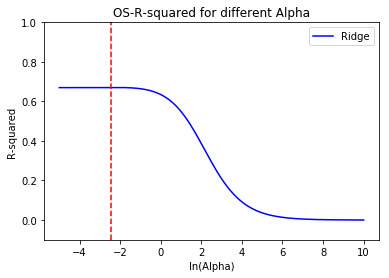

Optimal alpha for Ridge=0.0843949912329, best OS R_2=0.67094825807


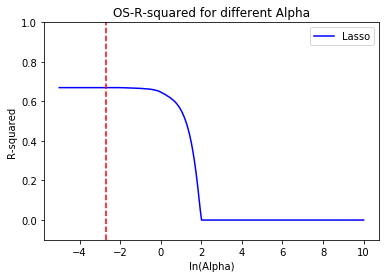

Optimal alpha for Lasso=0.0676932182983, best OS R_2=0.670643810909


In [42]:
lm8 = smf.ols(formula = 'price_per_sqft ~  bathrooms + numfloors + unitsres + yearbuilt  + pop_foreign_pct + pop_pov_pct + pop_edu_collp_pct + hh_inc_med + cb_count + general_count + school_count + linknyc_count + park_count', data = df_train).fit()
print(lm8.summary())

print(r2_score(df_test.price_per_sqft,lm8.predict(df_test)))
dataTrain = df_train[['price_per_sqft','bathrooms','numfloors','unitsres','yearbuilt','pop_foreign_pct','pop_pov_pct','pop_edu_collp_pct','hh_inc_med','cb_count','general_count','school_count','linknyc_count','park_count']]
dataTest = df_test[['price_per_sqft','bathrooms','numfloors','unitsres','yearbuilt','pop_foreign_pct','pop_pov_pct','pop_edu_collp_pct','hh_inc_med','cb_count','general_count','school_count','linknyc_count','park_count']]

alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
[alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(1,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
print('Optimal alpha for Ridge={0}, best OS R_2={1}'.format(alpha_optimal,best_R2))
alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
[alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(2,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
print('Optimal alpha for Lasso={0}, best OS R_2={1}'.format(alpha_optimal,best_R2))

In [248]:
lm_ridge = linear_model.Ridge(fit_intercept=True, alpha=0.0843949912329) #assign the model
lm_ridge.fit(dataTrain.iloc[:,1:],dataTrain.price_per_sqft)
print(lm_ridge.coef_)

lm_lasso = linear_model.Lasso(fit_intercept=True, alpha=0.0676932182983) #assign the model
lm_lasso.fit(dataTrain.iloc[:,1:],dataTrain.price_per_sqft)
print(lm_lasso.coef_)

[ 3.88581520e+01  1.34533141e+01 -1.68375517e-01  1.67659503e+00
  2.11756566e+02  5.12597592e+02  4.63184035e+02  2.11788009e-03
  8.00047749e-04  1.54865361e+00 -3.39482824e+00  1.39614650e+00
  1.39614651e+00]
[ 3.88097287e+01  1.34842378e+01 -1.68442220e-01  1.67719923e+00
  2.06636416e+02  4.96237332e+02  4.56130018e+02  2.10618024e-03
  7.98366479e-04  1.55713374e+00 -3.36214790e+00  2.80075552e+00
  1.76862759e-16]


In [250]:
lm8 = smf.ols(formula = 'price_per_sqft ~  bathrooms + numfloors + unitsres + yearbuilt + pop_foreign_pct + pop_pov_pct + pop_edu_collp_pct + hh_inc_med + cb_count + general_count + school_count + linknyc_count ', data = df_train).fit()
print(lm8.summary())
r2_score(df_test.price_per_sqft,lm8.predict(df_test))

                            OLS Regression Results                            
Dep. Variable:         price_per_sqft   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     571.3
Date:                Mon, 16 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:56:02   Log-Likelihood:                -24529.
No. Observations:                3366   AIC:                         4.908e+04
Df Residuals:                    3353   BIC:                         4.916e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3401.9862    347.83

0.6696424965295045

                            OLS Regression Results                            
Dep. Variable:         price_per_sqft   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     579.4
Date:                Mon, 16 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:57:14   Log-Likelihood:                -24825.
No. Observations:                3366   AIC:                         4.967e+04
Df Residuals:                    3356   BIC:                         4.973e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3129.4038    378

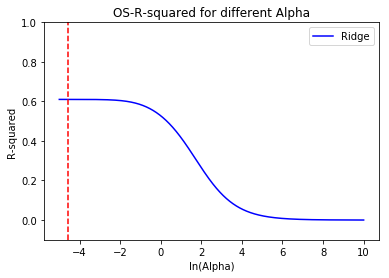

Optimal alpha for Ridge=0.0101329864076, best OS R_2=0.610205327679


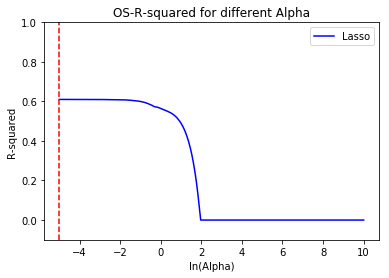

Optimal alpha for Lasso=0.00673794699909, best OS R_2=0.610115245355


In [251]:




dataTrain = df_train[['price_per_sqft','bathrooms','numfloors','unitsres','yearbuilt', 'pop_race_white_pct','pop_foreign_pct','pop_pov_pct','pop_edu_collp_pct','hh_inc_med']]
dataTest = df_test[['price_per_sqft','bathrooms','numfloors','unitsres','yearbuilt','pop_race_white_pct','pop_foreign_pct','pop_pov_pct','pop_edu_collp_pct','hh_inc_med']]

alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
[alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(1,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
print('Optimal alpha for Ridge={0}, best OS R_2={1}'.format(alpha_optimal,best_R2))
alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
[alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(2,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
print('Optimal alpha for Lasso={0}, best OS R_2={1}'.format(alpha_optimal,best_R2))

In [252]:
lm_ridge = linear_model.Ridge(fit_intercept=True, alpha=0.0101329864076) #assign the model
lm_ridge.fit(dataTrain.iloc[:,1:],dataTrain.price_per_sqft)
print(lm_ridge.coef_)

lm_lasso = linear_model.Lasso(fit_intercept=True, alpha=0.00673794699909) #assign the model
lm_lasso.fit(dataTrain.iloc[:,1:],dataTrain.price_per_sqft)
print(lm_lasso.coef_)

[ 3.68866492e+01  1.58620944e+01 -1.91219176e-01  1.42837898e+00
 -4.21193544e+01  2.01368151e+02  1.17354029e+03  1.11867923e+03
  2.63051937e-03]
[ 3.68814622e+01  1.58650221e+01 -1.91219867e-01  1.42817773e+00
 -4.20016774e+01  2.00962690e+02  1.17289280e+03  1.11829414e+03
  2.62970892e-03]


In [44]:
lm9 = smf.ols(formula = 'price_per_sqft ~  bathrooms + numfloors + unitsres + yearbuilt + pop_race_white_pct + pop_foreign_pct + pop_pov_pct + pop_edu_collp_pct + hh_inc_med', data = df_train).fit()
print(lm9.summary())
r2_score(df_test.price_per_sqft,lm9.predict(df_test))

                            OLS Regression Results                            
Dep. Variable:         price_per_sqft   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     579.4
Date:                Tue, 17 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:19:37   Log-Likelihood:                -24825.
No. Observations:                3366   AIC:                         4.967e+04
Df Residuals:                    3356   BIC:                         4.973e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3129.4038    378

0.6101370570378186

###### lm10 = smf.ols(formula = 'price_per_sqft ~  bathrooms + numfloors + unitsres + yearbuilt + pop_race_white_pct + pop_foreign_pct + pop_pov_pct+ hh_inc_med + cb_div +  general_div +  restaurant_div ', data = df_train).fit()
print(lm10.summary())
print(r2_score(df_test.price_per_sqft,lm10.predict(df_test)))

dataTrain = df_train[['price_per_sqft','bathrooms','numfloors','unitsres','yearbuilt', 'pop_race_white_pct','pop_foreign_pct','pop_pov_pct','hh_inc_med', 'cb_div',  'general_div','restaurant_div']]
dataTest = df_test[['price_per_sqft','bathrooms','numfloors','unitsres','yearbuilt','pop_race_white_pct','pop_foreign_pct','pop_pov_pct','hh_inc_med', 'cb_div', 'general_div', 'restaurant_div']]

alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
[alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(1,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
print('Optimal alpha for Ridge={0}, best OS R_2={1}'.format(alpha_optimal,best_R2))
alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
[alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(2,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
print('Optimal alpha for Lasso={0}, best OS R_2={1}'.format(alpha_optimal,best_R2))

In [257]:
lm_ridge = linear_model.Ridge(fit_intercept=True, alpha=0.00673794699909) #assign the model
lm_ridge.fit(dataTrain.iloc[:,1:],dataTrain.price_per_sqft)
print(lm_ridge.coef_)

lm_lasso = linear_model.Lasso(fit_intercept=True, alpha=0.0583506880577) #assign the model
lm_lasso.fit(dataTrain.iloc[:,1:],dataTrain.price_per_sqft)
print(lm_lasso.coef_)

[ 3.41096530e+01  1.42901887e+01 -1.65800566e-01  1.45598000e+00
  1.72189880e+02  3.78565049e+02  7.02579531e+02  3.39089676e-03
  3.35864567e+01  1.06936545e+03 -4.81705488e+02]
[ 3.40785130e+01  1.43100806e+01 -1.66354762e-01  1.45743722e+00
  1.69609491e+02  3.74176516e+02  6.87062850e+02  3.37167347e-03
  3.37069046e+01  1.05577998e+03 -4.68099273e+02]


In [41]:
lm5 = smf.ols(formula = 'price_per_sqft ~  bathrooms + numfloors + unitsres + yearbuilt + park_count + cb_count * cb_div + general_count * general_div + school_count * school_div + hospital_count * hospital_div + restaurant_count * restaurant_div', data = df_train).fit()
print(lm5.summary())
r2_score(df_test.price_per_sqft,lm5.predict(df_test))

                            OLS Regression Results                            
Dep. Variable:         price_per_sqft   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     393.3
Date:                Tue, 17 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:14:15   Log-Likelihood:                -24368.
No. Observations:                3366   AIC:                         4.878e+04
Df Residuals:                    3345   BIC:                         4.891e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

0.6807055462612694

In [34]:

lm6 = smf.ols(formula = 'price_per_sqft ~  bathrooms + numfloors + unitsres + yearbuilt + pop_num + pop_race_white_pct + pop_foreign_pct + pop_pov_pct + hh_inc_med + park_count + cb_count * cb_div + general_count * general_div + school_count * school_div + hospital_count * hospital_div + restaurant_count * restaurant_div', data = df).fit()
print(lm6.summary())


                            OLS Regression Results                            
Dep. Variable:         price_per_sqft   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     485.1
Date:                Sun, 15 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:12:23   Log-Likelihood:                -34839.
No. Observations:                4834   AIC:                         6.973e+04
Df Residuals:                    4808   BIC:                         6.990e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [35]:
r2_score(df_test.price_per_sqft,lm6.predict(df_test))

0.719165179508345

                            OLS Regression Results                            
Dep. Variable:         price_per_sqft   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     1244.
Date:                Sun, 15 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:47:57   Log-Likelihood:                -36171.
No. Observations:                4834   AIC:                         7.235e+04
Df Residuals:                    4829   BIC:                         7.238e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         599.3241     67.311     

In [267]:
df['pop_mig_div_ind'] = df['pop_mig_div_ind'].astype(float)
df_tree = df.drop(columns=['price','clean', 'geoid', 'area', 'postal_code','pop_65p_pct', 'pop_18_64_pct','pop_race_white_pct','pop_bornstate_pct',
                           'pop_edu_nohs_pct','pop_edu_hs_pct', 'pop_edu_somecoll_pct', 'pop_edu_associates_pct',
                           'pop_edu_coll_pct', u'pop_edu_grad_pct', 'crime_prop_num', 'crime_viol_num', 'crime_all_num',
                            'crime_prop_rt', 'crime_viol_rt','pop_born_outstate_pct'])

In [268]:
high = df_tree.price_per_sqft.quantile(.8)
df_tree['price_label'] = ''

for i in range(0, len(df_tree)):
    
    if df_tree.iloc[i, 0] >= high:
        df_tree.price_label[i] = "high"
    else:
        df_tree.price_label[i] = "normal"
        

/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [269]:
df_tree.head()
len(df_tree)

4809

In [275]:
y=df_tree.iloc[:,-1]

# Get the feature space.  We are using only features from before the stop, getting rid of features from during/after the stop like "arrested".
X=df_tree.iloc[:,1:-2]
X=pd.get_dummies(X)
X.head()



,beds,bathrooms,lat,lon,schooldist,numfloors,unitsres,unitstotal,residfar,yearbuilt,...,borough_MN,borough_QN,borough_SI,type_2 to 4 family,type_5 family,type_condo,type_coop,type_mix,type_other,type_single family
0,2,3.0,40.747050,-73.989525,2.0,24.0,3025.0,3027.0,10.00,2016.0,...,1,0,0,0,0,0,0,0,1,0
1,1,1.0,40.746380,-73.996758,2.0,12.0,0.0,0.0,6.02,2014.0,...,1,0,0,0,0,1,0,0,0,0
2,2,3.0,40.754624,-74.002313,2.0,71.0,137.0,140.0,10.00,2015.0,...,1,0,0,0,1,0,0,0,0,0
3,2,2.0,40.749810,-73.994784,2.0,12.0,29.0,30.0,9.00,1986.0,...,1,0,0,0,0,0,0,0,1,0
4,3,4.0,40.754624,-74.002313,2.0,71.0,137.0,140.0,10.00,2015.0,...,1,0,0,0,1,0,0,0,0,0


In [276]:
## Split data into 70% train, 30% test
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.4, random_state=999)

In [277]:
from sklearn.tree import DecisionTreeClassifier

# learn model
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

# in sample accuracy
print 'In sample accuracy:',dt.score(X_train,y_train)

# out of sample accuracy
print 'Out of sample accuracy:',dt.score(X_test,y_test)

In sample accuracy: 1.0
Out of sample accuracy: 0.9963617463617463


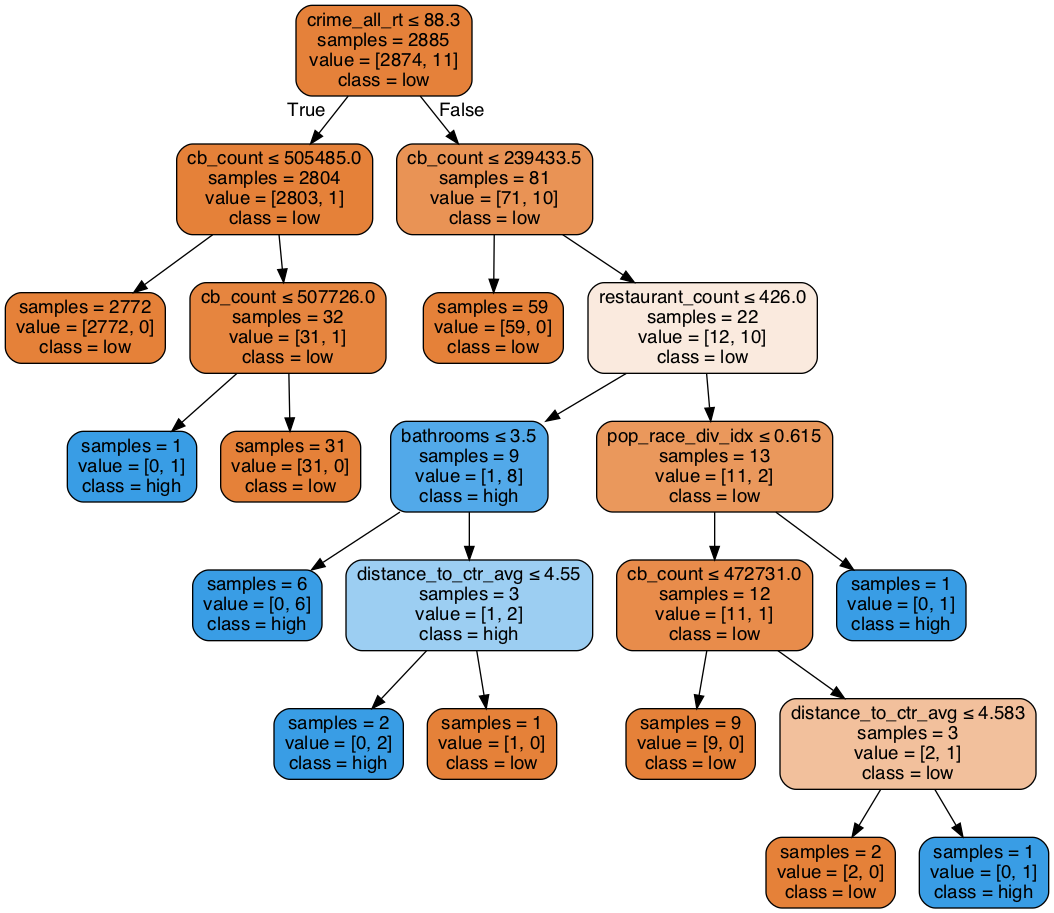

In [279]:
from sklearn import tree

dt = DecisionTreeClassifier(max_depth=6) # just to keep it simple for visualization
dt.fit(X_train,y_train)

from IPython.display import Image  
import pydotplus
thestring = tree.export_graphviz(dt, out_file=None,  
                         feature_names=X_train.columns.values, 
                         class_names=['low', 'high'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

In [280]:
X_train_div = X_train[['pop_race_div_idx','pop_mig_div_ind', 'cb_div', 'general_div', 'school_div', 'hospital_div', 'restaurant_div']]
X_test_div = X_test[['pop_race_div_idx','pop_mig_div_ind', 'cb_div', 'general_div', 'school_div', 'hospital_div', 'restaurant_div']]

In [281]:
dt_div=DecisionTreeClassifier()
dt_div.fit(X_train_div,y_train)

# in sample accuracy
print 'In sample accuracy:',dt_div.score(X_train_div,y_train)

# out of sample accuracy
print 'Out of sample accuracy:',dt_div.score(X_test_div,y_test)

In sample accuracy: 0.9993067590987869
Out of sample accuracy: 0.9974012474012474


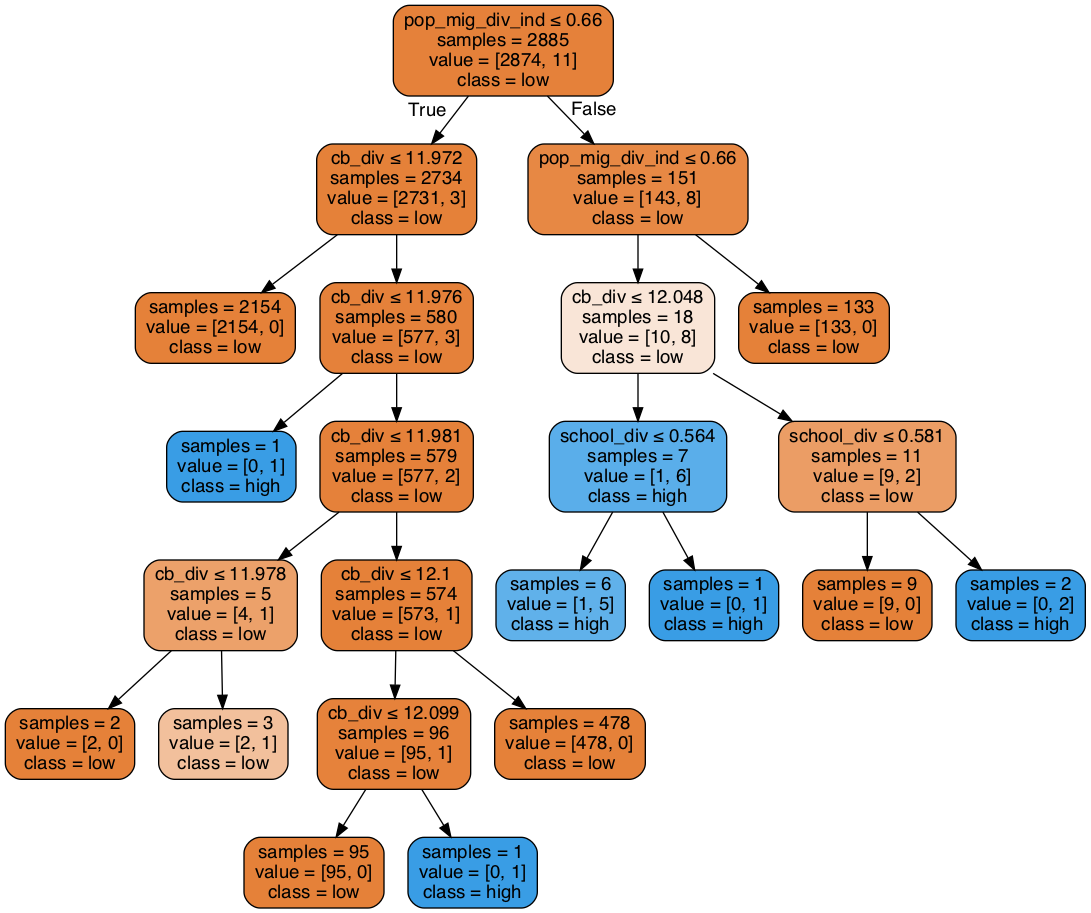

In [282]:
dt_div = DecisionTreeClassifier(max_depth=6) # just to keep it simple for visualization
dt_div.fit(X_train_div,y_train)
thestring = tree.export_graphviz(dt_div, out_file=None,  
                         feature_names=X_train_div.columns.values, 
                         class_names=['low', 'high'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

In [288]:
df.iloc[:, 30:].dtypes

pop_mig_div_ind           float64
pop16_64_unemp_pct        float64
pop_pov_pct               float64
pop_edu_nohs_pct          float64
pop_edu_hs_pct            float64
pop_edu_somecoll_pct      float64
pop_edu_associates_pct    float64
pop_edu_coll_pct          float64
pop_edu_grad_pct          float64
pop_edu_collp_pct         float64
hh_inc_med                float64
crime_prop_num            float64
crime_viol_num            float64
crime_all_num             float64
crime_prop_rt             float64
crime_viol_rt             float64
crime_all_rt              float64
noise_count                 int64
cb_count                    int64
cb_div                    float64
general_count               int64
general_div               float64
school_count                int64
school_div                float64
hospital_count              int64
hospital_div              float64
linknyc_count               int64
restaurant_count            int64
restaurant_div            float64
park_count    

In [291]:
pca_df = df.drop(columns = ['clean', 'borough', 'type', 'geoid'])

/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


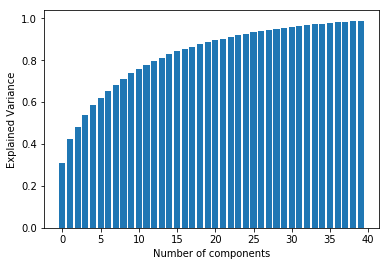

In [312]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(pca_df)

df_S=scaler.transform(pca_df)  
pca = PCA(df_S.shape[1])
data_P=pca.fit_transform(df_S)

eigenvalues = pca.explained_variance_ratio_
#plot explained variance over the number of compinents
n=40
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()


In [293]:
Z=np.array(df.borough)
manhattanInd=(Z == 'MN') #Manhattan
statenInd=(Z == 'SI') #Staten Island
brooklynInd=(Z == 'BK') #Brooklyn
queensInd=(Z == 'QN') #Queens
bronxInd=(Z == 'BX') #Bronx
#create an array of the same length as data311 index providing the borough number
D=Z*0
D[manhattanInd]=0
D[statenInd]=1
D[brooklynInd]=2
D[queensInd]=3
D[bronxInd]=4

D

array([1, 1, 1, ..., 4, 4, 4], dtype=object)

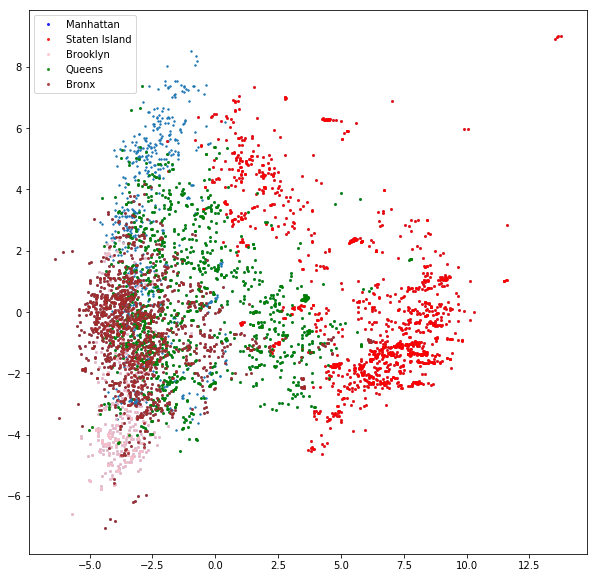

In [301]:
colors=('blue','red', 'pink','green', 'brown')
fig = plt.figure(figsize=(10,10))
for d in range(0,5):
    plt.plot(np.array(data_P[D==d,0]), np.array(data_P[D==d,1]),
        'o', color=colors[d], alpha=0.8, label=d, markersize = 2)
plt.legend(['Manhattan', 'Staten Island', 'Brooklyn', 'Queens', 'Bronx'],loc='upper left')
plt.scatter(data_P[:,0],data_P[:,1], s = 2)

In [23]:
Z=np.array(df.type)
single_Ind=(Z == 'single family') 
two_to_four_Ind=(Z == '2 to 4 family')
five_Ind=(Z == '5 family')
condoInd=(Z == 'condo') 
coopInd=(Z == 'coop') 
mixInd=(Z == 'mix') 
otherInd =(Z == 'other') 
#create an array of the same length as data311 index providing the borough number
D=Z*0
D[single_Ind]=0
D[two_to_four_Ind]=1
D[five_Ind]=2
D[condoInd]=3
D[coopInd]=4
D[mixInd]=5
D[otherInd]=6

D = D.tolist()

df.type_new = D

df.type_new

[6,
 3,
 2,
 6,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 6,
 4,
 2,
 4,
 6,
 6,
 2,
 2,
 2,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 4,
 4,
 6,
 6,
 2,
 2,
 4,
 6,
 3,
 4,
 0,
 4,
 4,
 6,
 3,
 4,
 1,
 4,
 6,
 6,
 4,
 1,
 4,
 6,
 4,
 4,
 6,
 6,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 2,
 4,
 6,
 6,
 6,
 6,
 6,
 2,
 6,
 6,
 4,
 4,
 1,
 0,
 1,
 1,
 4,
 1,
 4,
 4,
 2,
 6,
 6,
 4,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 4,
 6,
 4,
 6,
 4,
 6,
 6,
 6,
 4,
 6,
 3,
 4,
 4,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 2,
 2,
 2,
 6,
 2,
 6,
 6,
 4,
 6,
 2,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 4,
 6,
 6,
 2,
 4,
 4,
 6,
 6,
 6,
 1,
 1,
 1,
 1,
 6,
 0,
 1,
 1,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 4,
 0,
 1,
 6,
 6,
 1,
 1,
 1,
 6,
 6,
 6,
 6,
 6,
 2,
 2,
 2,
 2,
 2,
 2,
 6,
 6,
 6,
 6,
 2,
 6,
 2,
 2,
 2,
 2,
 2,
 2,


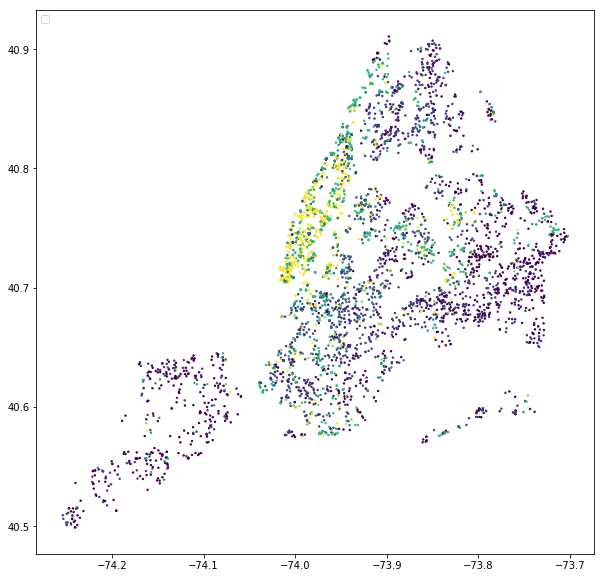

In [27]:
colors=('yellow','green', 'pink','red', 'brown', 'orange', 'violet')
fig = plt.figure(figsize=(10,10))

plt.legend(['single family', '2 to 4 family', '5 family', 'condo', 'coop', 'mix', 'other'],loc='upper left')
plt.scatter(df.lon,df.lat, c= type_new, s = 2)

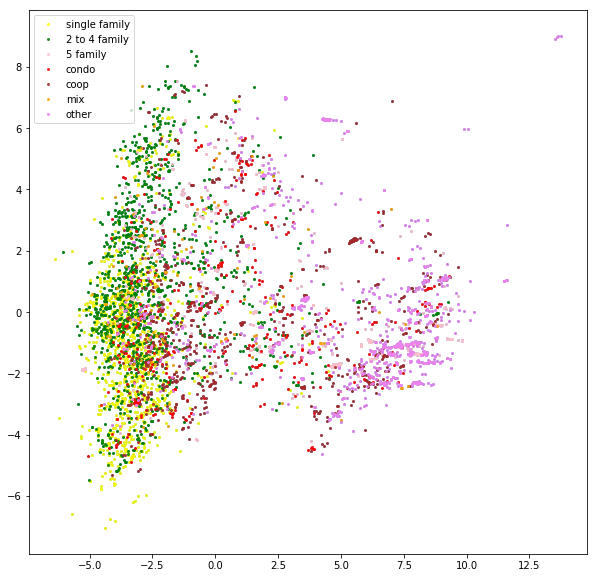

In [311]:
colors=('yellow','green', 'pink','red', 'brown', 'orange', 'violet')
fig = plt.figure(figsize=(10,10))
for d in range(0,7):
    plt.plot(np.array(data_P[D==d,0]), np.array(data_P[D==d,1]),
        'o', color=colors[d], alpha=0.8, label=d, markersize = 2)
plt.legend(['single family', '2 to 4 family', '5 family', 'condo', 'coop', 'mix', 'other'],loc='upper left')
plt.scatter(data_P[:,0],data_P[:,1], s = 2)

In [313]:
ct = gpd.read_file("2010 Census Tracts/geo_export_f152fa2a-eef9-4c52-99ac-10da8623c573.shp")

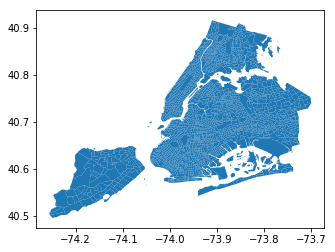

In [314]:
ct.plot()

In [316]:
boro_dict = {'Staten Island':'085', 'Manhattan': '061', 'Bronx':'005', 'Brooklyn': '047', 'Queens': '081'}
ct = ct.replace(dict(boro_name=boro_dict))

In [336]:
ct['state'] = '36'
ct['geoid'] = ct[['state','boro_name', 'ct2010']].apply(lambda x: ''.join(x), axis=1)

In [337]:
acs = pd.read_csv("acs_lite_new.csv",dtype={'geoid':str})
ct_new = ct.merge(acs, on = "geoid", how = "left")
ct_new.head()
ct_new.columns

Index([             u'boro_code',             u'boro_ct201',
                    u'boro_name',             u'cdeligibil',
                       u'ct2010',                u'ctlabel',
                      u'ntacode',                u'ntaname',
                         u'puma',             u'shape_area',
                   u'shape_leng',               u'geometry',
                        u'geoid',                  u'state',
                      u'pop_num',            u'pop_u18_pct',
                  u'pop_65p_pct',          u'pop_18_64_pct',
           u'pop_race_asian_pct',     u'pop_race_black_pct',
            u'pop_race_hisp_pct',     u'pop_race_white_pct',
             u'pop_race_div_idx',      u'pop_bornstate_pct',
              u'pop_foreign_pct',  u'pop_born_outstate_pct',
              u'pop_mig_div_ind',     u'pop16_64_unemp_pct',
                  u'pop_pov_pct',       u'pop_edu_nohs_pct',
               u'pop_edu_hs_pct',   u'pop_edu_somecoll_pct',
       u'pop_edu_associa

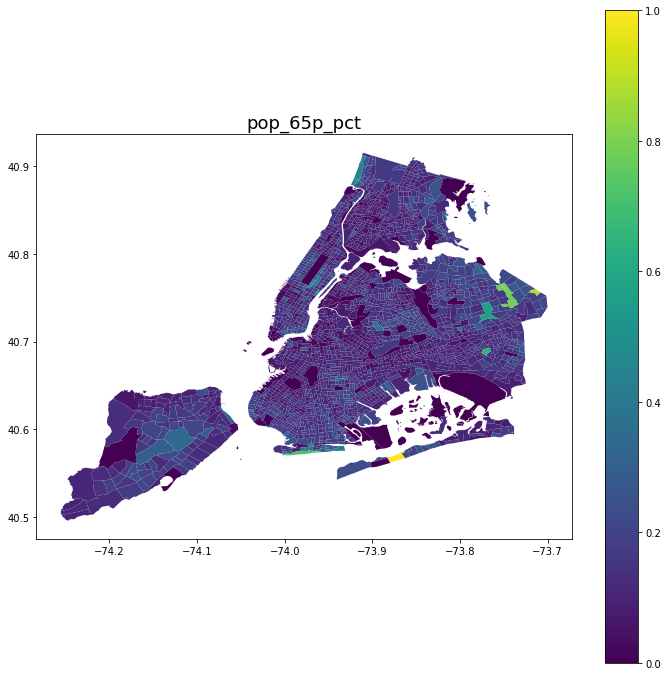

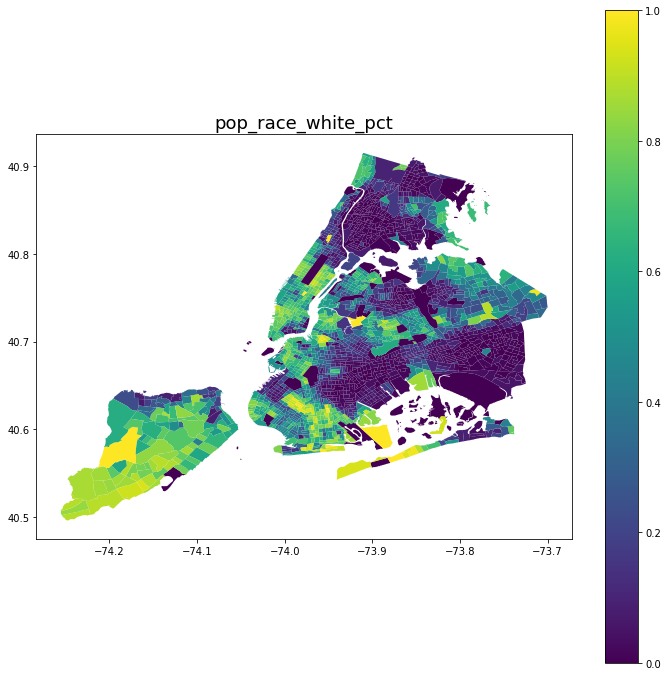

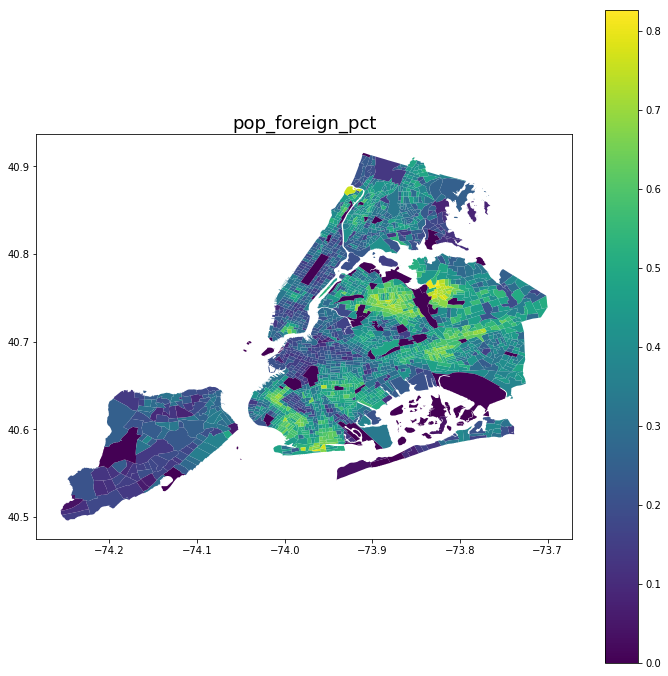

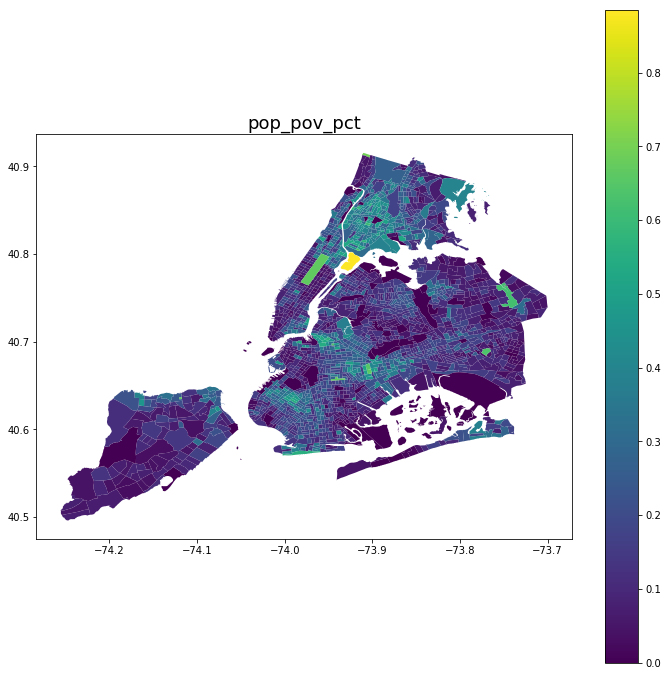

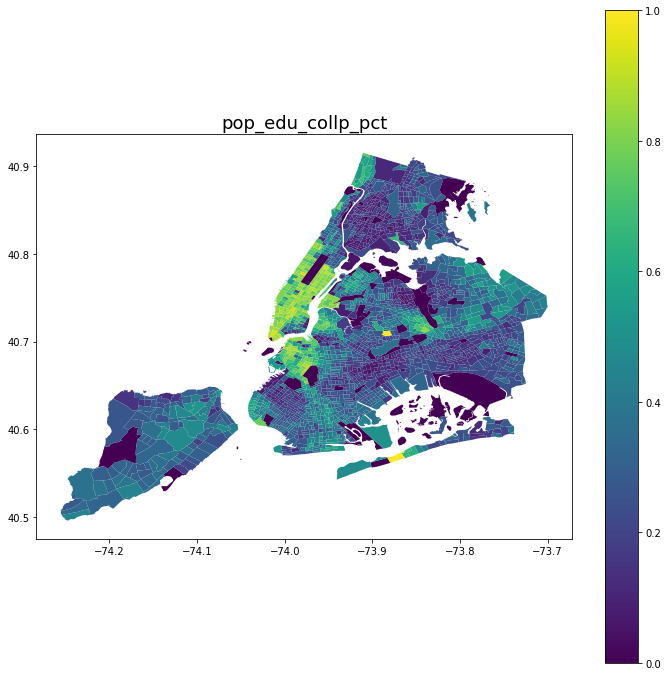

In [338]:

for M in ['pop_65p_pct', 'pop_race_white_pct','pop_foreign_pct','pop_pov_pct','pop_edu_collp_pct',]:
    f, ax = plt.subplots(1, figsize=(12, 12))
    ax.set_title(M, fontsize=18)
    #ct_new[M] = np.log(ct_new[M])
    ct_new = ct_new.replace([np.inf, -np.inf, np.NaN], 0.0)
    ct_new.plot(ax=ax, column=M, legend=True)
    plt.savefig(M+'.png')